In [151]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

#### $p(x)=N(x|\mu,\Lambda^{-1})$ 
#### $\left\{
            \begin{array}{ll}
            \mu=0\\
            \Lambda^{-1}=1\\
            \end{array}
      \right.$

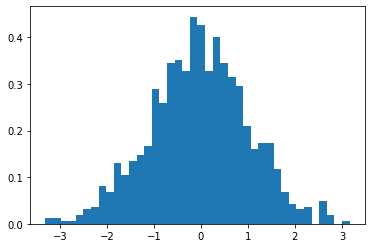

In [152]:
n_samples = 1000
x_mean = 0
x_cov = 1

x_samples = scipy.stats.multivariate_normal(mean=x_mean, cov=x_cov).rvs(n_samples)
plt.hist(x_samples, bins=40, density=True)
plt.show()

#### $p(y|x)=N(y|Ax+b,L^{-1})$
#### $\left\{
            \begin{array}{ll}
            A=\begin{pmatrix}
               2 \\
               1
              \end{pmatrix}\\
            b=\begin{pmatrix}
               1 \\
               1
              \end{pmatrix}\\
            L^{-1}=\begin{pmatrix} 
                    1 & 0.5 \\
                    0.5 & 1 
                    \end{pmatrix}\\
            \end{array}
      \right.$

In [153]:
A = np.array([2, 1])
b = np.array([1, 1])
y_cov = np.array(((1, 0.5), (0.5, 1)))

#### $Plot\;p(y|Ax^{(0)}+b,L^{-1}),p(y|Ax^{(1)}+b,L^{-1}),p(y|Ax^{(2)}+b,L^{-1})$
#### $x^{(n)}\;are\;samples\;from\;p(x)$

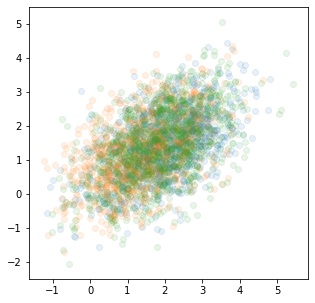

In [154]:
plt.figure(figsize=[5, 5])
for x_sample in x_samples[:3]:
    x_sample = x_sample
    y_mean = A * x_sample + b
    y_samples = scipy.stats.multivariate_normal(mean=y_mean, cov=y_cov).rvs(n_samples)

    plt.scatter(y_samples[:, 0], y_samples[:, 1], alpha=0.1)
plt.show()

#### $Plot\;p(y|Ax^{(n)}+b,L^{-1})$

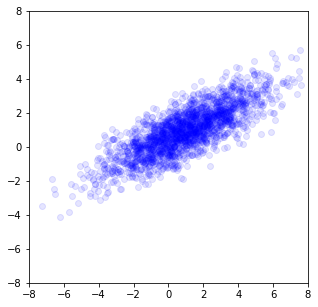

In [155]:
plt.figure(figsize=[5, 5])
for x_sample in x_samples:
    x_sample = x_sample
    y_mean = A * x_sample + b
    y_samples = scipy.stats.multivariate_normal(mean=y_mean, cov=y_cov).rvs(2)

    plt.scatter(y_samples[:, 0], y_samples[:, 1], alpha=0.1, c='b')
plt.xlim(-8, 8)
plt.ylim(-8, 8)
plt.show()

#### $Plot\;marginal\;distribution\;p(y)=N(y|A\mu+b,L^{-1}+A\Lambda^{-1}A^T)$

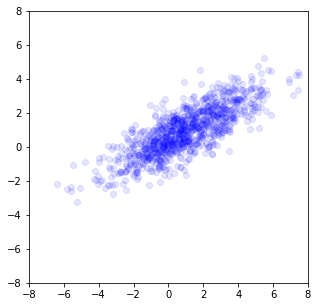

In [156]:
plt.figure(figsize=[5, 5])
y_marginal_mean = A * x_mean + b
y_marginal_cov = y_cov + A[:, None] * x_cov @ A[:, None].T
y_marginal_samples = scipy.stats.multivariate_normal(mean=y_marginal_mean, cov=y_marginal_cov).rvs(n_samples)
plt.scatter(y_marginal_samples[:, 0], y_marginal_samples[:, 1], alpha=0.1, c='b')
plt.xlim(-8, 8)
plt.ylim(-8, 8)
plt.show()

#### $Plot\;conditional\;distribution$
#### $\;p(x|y)=N(x|\Sigma\{A^T L(y-b)+\Lambda\mu\},\Sigma)$
#### $where,\;\Sigma=(\Lambda+A^T LA)^{-1}$

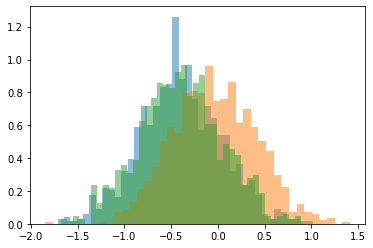

In [172]:
y_samples = np.array([[0, 0], [1, 0], [0, 1]])

for y_sample in y_samples:
    x_conditional_cov = 1/(1/x_cov + (A[:, None].T @ np.linalg.inv(y_cov) @ A[:, None])[0, 0])
    x_conditional_mean = x_conditional_cov * (A.T @ np.linalg.inv(y_cov) @ (y_sample - b) + 1/x_cov * x_mean)
    x_conditional_samples = scipy.stats.multivariate_normal(mean=x_conditional_mean, cov=x_conditional_cov).rvs(n_samples)
    plt.hist(x_conditional_samples, bins=40, density=True, alpha=0.5)

plt.show()    
    